# SymPy

SymPy es un paquete de Python de Computación Simbólica. La computación simbólica se ocupa de la computación de objetos matemáticos simbólicamente. Esto significa que los objetos matemáticos se representan exactamente, no aproximadamente, y las expresiones matemáticas con variables no evaluadas se dejan en forma simbólica.

Sympy permite al usuario realizar operaciones numéricas así como operaciones analíticas o con símbolos. Por ejemplo:

In [1]:
import math
import sympy
l1=math.sqrt(8)
l2=sympy.sqrt(8)
print(l1,l2)

2.8284271247461903 2*sqrt(2)


La variable l1 es la cantidad evaluada numéricamente, mientras que, la variable l2 es la cantidad indicada simbólicamente guardada por sympy. 

Sympy reconoce tres tipos de variables: Reales, Enteros y Racionales. Las dos primeras ya se han visto anteriormente, la clase Racional representa un número racional dejando indicada la fracción. 

In [2]:
a=sympy.Rational(1,4)
print(a)

1/4


SymPy usa la librería mpmath como auxiliar, lo que hace posible ejecutar cálculos numéricos usando aritmética con precisión arbitraria. Por lo que algunas constantes especiales como $e$, $\pi$ o $\infty$ son tratadas como símbolos y pueden ser evaluadas numérocamente

In [3]:
sympy.exp,sympy.pi,sympy.oo

(exp, pi, oo)

También existe la función \texttt{evalf()} que evalúa la función 

In [4]:
from sympy import *
pi.evalf(),(pi**2+exp(1)).evalf(),oo.evalf()

(3.14159265358979, 12.5878862295484, oo)

La función evalf es una buena herramienta si se quiere hacer evaluaciones simples, pero si se tiene la intención de evaluar una expresión más compleja o com más puntos, existen formas más eficientes. Por ejemplo, si quisiera evaluar una expresión en mil puntos, usar solo SymPy sería mucho más lento de lo necesario. En su lugar, se podrá auxiliar con la librería numpy. La forma más sencilla de convertir una expresión simbólica en una expresión que se pueda evaluar numéricamente es utilizar la función lambdify(), que actúa como una función lambda, excepto que convierte los nombres de SymPy a los nombres de la biblioteca numérica dada, generalmente NumPy. Por ejemplo

In [5]:
from sympy import *
import numpy
a = numpy.arange(10)
x=Symbol('x')
expr = cos(x)
f = lambdify(x, expr, "numpy") 
print(f(a))

[ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362  0.28366219
  0.96017029  0.75390225 -0.14550003 -0.91113026]


In [39]:
from sympy import *
a=10
x=Symbol('x')
expr=(factorial(x)/x**x)#cos(x))
f=lambdify(x,expr)
print(f(a))

0.00036288


Otro ejemplo del uso de lambdify().

In [6]:
f = lambdify(x, x + 1)
print(f(1),f(2))

2 3


Hasta el momento, se ha usado sympy como una calculadora bastante poderosa, pero no se ha hecho nada simbólico. Para empezar con el cálculo simbólico lo primero que se tiene que hacer es declarar las variables simbólicas de forma explícita.

In [7]:
import sympy
x=sympy.Symbol('x')
y=sympy.Symbol('y')
z=sympy.Symbol('z')

De esta manera, las variables simbólicas pueden ser usadas con total libertad

In [40]:
print(x**2+y**2+z**2)
print(x**y/z)
print((x+y)**3)
print(expand((x+y)**3))
print(expand(cos(x+y)))
print(expand(cos(x+y), trig=True))

x**2 + y**2 + z**2
x**y/z
(x + y)**3
x**3 + 3*x**2*y + 3*x*y**2 + y**3
cos(x + y)
-sin(x)*sin(y) + cos(x)*cos(y)


La función expand() regresa la expansión algebraica del polinomio introducido como argumento. La opción trig=True indica que se usen identidades trigonométricas para la expansión

In [9]:
expand(cos(x+y), trig=True)

-sin(x)*sin(y) + cos(x)*cos(y)

Si por el contrario de expandir, se desea simplificar, se utilizará la función simplify

In [10]:
simplify((x+x*y)/x)

y + 1

La simplificación es muy general, pero si queremos ser más específicos  y que la simplificación se haga de una forma en particular , se pueden usar alternativas más precisas que simplify: powsimp (simplificación de exponentes), trigsimp (para expresiones trigonométricas) , logcombine, radsimp y together.

In [11]:
trigsimp(sin(x)/cos(x))

tan(x)

También SymPy tiene la opción para resolver ecuaciones algebraicas, como sería $x^2-2=0$

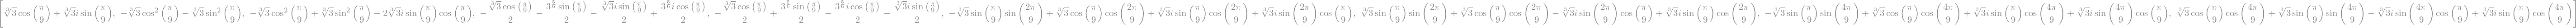

In [44]:
solve(x**9 + 20 +7,x)

Con esto podemos resolver simbólicamente la tarea y comparar con las soluciones numéricas

In [13]:
solve(2*x**2+5*x-3,x)

[-3, 1/2]

In [14]:
solve(sin(x)/x)  # 0 es excluido

[pi]

In [15]:
solve(sin(x)/x, check=False)

[0, pi]

In [16]:
solve(cos(x),x)

[pi/2, 3*pi/2]

In [17]:
solve(x**2-14*x-50,x)

[7 - 3*sqrt(11), 7 + 3*sqrt(11)]

In [18]:
solve(x**1/3+3,x)

[-9]

In [19]:
solve(tan(x) - x, x)

NotImplementedError: multiple generators [x, tan(x)]
No algorithms are implemented to solve equation -x + tan(x)

In [20]:
nsolve(tan(x) - x, x, 1)

0.000348227174421857

from pylab import *
t=arange(-3*pi,3*pi,0.01)
#f=lambda t: (tan(t)-t)
def f(t):
    return tan(t)-t
plot(t,f(t))
ylim(-10,10)
axhline(y = 0, color = 'r', linestyle = '--')

El poder real de un sistema de cálculo simbólico como SymPy es la capacidad de hacer todo tipo de cálculos simbólicamente. SymPy puede simplificar expresiones, calcular derivadas, integrales y límites, resolver ecuaciones, trabajar con matrices y mucho, mucho más, y hacerlo todo simbólicamente. Incluye módulos para gráfica, imprimir en LaTeX, generación de código, física, estadística, combinatoria, teoría de números, geometría, lógica y más.

Posiblemente el lector no esté totalmente familiarizado con los ejemplos que se verán a continuación ya que son tópicos avanzados. Sin embargo, creo que es importante que el lector haga estos ejercicios antes de adentrarse a los temas ya que le ayudarán a tener la comprobación computacional de cualquier ejercicio que pudiera llegar a hacer.

Los límites son fáciles de usar en SymPy con la sintaxis limit(función, variable, punto). Para calcular el límite de $f(x)$ como $x\rightarrow0$, deberías usar la siguiente expresión limit(f, x, 0)

In [47]:
from sympy import *
x=Symbol('x')

print(limit(sin(x)/x,x,0))
print(limit(x**x,x,0))
print(limit(x, x, oo))
print(limit(1/x**2, x, oo))

1
1
oo
0


La derivación de cualquier expresión usa la función diff(func,var), por ejemplo

In [48]:
diff(sin(x), x)

In [49]:
diff(sin(2*x), x)

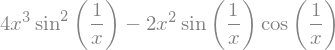

In [52]:
diff((x**2*sin(1/x))**2,x)

Para comprobar que tan correcto es la derivación que presenta simpy. Haremos una derivada con la función diff y otra con la definición de derivada

$$
f'(x)=\lim_{y\rightarrow 0} \frac{f(x+y)-f(x)}{y}
$$

In [53]:
print('usando la funcion diff',diff(tan(x), x))
print('usando la definición',limit((tan(x+y)-tan(x))/y, y, 0))

usando la funcion diff tan(x)**2 + 1
usando la definición tan(x)**2 + 1


In [ ]:
#definir diferencia total

La función diff() también permite tener derivadas de orden superior, $n$, usando la sintaxis diff(func, var, n). Por ejemplo,

In [54]:
print(diff(sin(2*x), x, 1)) #orden 1
print(diff(sin(2*x), x, 2)) #orden 2
print(diff(sin(2*x), x, 9)) #orden 3

2*cos(2*x)
-4*sin(2*x)
512*cos(2*x)


Si se utiliza un Jupyter Notebook se puede modificar la visualización de salida de la respuesta del intérprete. Para esto, se usa la opción init_printing(use_unicode=True)

In [55]:
from sympy import *
x, t, z, nu = symbols('x t z nu')
init_printing(use_unicode=True)
diff(sin(x)*exp(x), x)

Así mismo, se pueden obtener expansiones de Series de Taylor. Las series de Taylor tienen la siguiente forma:

$$ 
f(x)=\sum_{n=0}^{\infty} \frac{f^{n}(x)}{n!}(x-a)^n
$$

Por ejemplo, la serie de Taylor de la función $\cos(x)$ es:

$$
\cos(x)=1-\frac{x^2}{2!}+\frac{x^4}{4!}-\frac{x^6}{6!}+\frac{x^8}{8!}-\cdots
$$

o la serie de Taylor de la función $\exp(x)$ es:

$$
\exp(x)=1+\frac{x}{1!}+\frac{x^2}{2!}+\frac{x^3}{3!}+\frac{x^4}{4!}-\cdots
$$

La librería sympy las calcula de la siguiente forma:

In [56]:
print(series(cos(x), x))
print(series(exp(x), x))

1 - x**2/2 + x**4/24 + O(x**6)
1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)


SymPy permite obtener integrales indefinidas o definidas de funciones especiales o de funciones transcendentes elementales. Las función que utiliza para esta tarea es integrate(), que usa una extensión del algoritmo Risch-Norman y reconocimiento de patrones. Un ejemplo básico será la integral indefinida de 
$$
\int \frac{1}{x}dx
$$

In [57]:
integrate(1/x,x)

In [58]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

Otro ejemplo de una integral definida de $-\infty$ a $\infty$

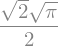

In [59]:
integrate(sin(x**2), (x, -oo, oo))

Sympy tiene su propio tipo de variable asignado a matriz, con él se pueden definir matrices numéricas o simbólicas y operar con ellas:

In [ ]:
Matrix([[1,0], [0,1]])

A diferencia de un  array o matrix de NumPy, en una matriz de Sympy se pueden incluir también símbolos

In [29]:
x = Symbol('x')
y = Symbol('y')
A = Matrix([[1,x], [y,1]])
print(A)
print(A**2)

Matrix([[1, x], [y, 1]])
Matrix([[x*y + 1, 2*x], [2*y, x*y + 1]])


Muchas de las funciones anteriores ya existen en Numpy con el mismo nombre (ones(), eye(), etc.) son redefinidas en SymPy con el mismo nombre, por lo que es recomendable importar los módulos como \texttt{import numpy as np} para ir indicando de que módulo es la función en cuestión. Por ejemplo:

In [30]:
import numpy as np
import sympy as sp
print('Identidad en SymPy',sp.eye(3))
print('Identidad en NumPy',np.eye(3))

Identidad en SymPy Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
Identidad en NumPy [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Notase la diferencia, en SymPy se guardado como un objeto tipo $\texttt{Matrix}$, mientras que en NumPy se despliega como un arreglo. Sin embargo, a pesar de las diferencias, es posible operar entre ellas, salvo que las matrices de Numpy no pueden tener una conversión simbólicamente. La selección de elementos de matrices de Sympy se hace de forma idéntica a los arrays o matrix de Numpy:

In [28]:
# Multiplico la matriz identidad por x
x = sp.Symbol('x')
M = sp.eye(3) * x
M

NameError: name 'sp' is not defined

Podemos hacer sustituciones de variables por otras, e.g., sustituir la variable $x$ por $y$

In [ ]:
y = sp.Symbol('y')
M.subs(x, y)

Así mismo, se puede obtener un determinante de una matriz:

In [ ]:
M = sp.Matrix(( [1, 2, 3], [3, 6, 2], [2, 0, 1] ))
M.det()

O la inversa de una matriz

In [ ]:
M.inv()

Para finalizar la parte de matrices, SymPy tiene habilitadas las funciones \texttt{eigenvals()} y \texttt{eigenvects()} que regresan los eigenvalores o valores propios de una matriz y los eigenvectores o vectores propios. 

In [31]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
print(M.eigenvals())
print(M.eigenvects())

{3: 1, -2: 1, 5: 2}
[(-2, 1, [Matrix([
[0],
[1],
[1],
[1]])]), (3, 1, [Matrix([
[1],
[1],
[1],
[1]])]), (5, 2, [Matrix([
[1],
[1],
[1],
[0]]), Matrix([
[ 0],
[-1],
[ 0],
[ 1]])])]


In [ ]:
Matrix([[1, 2], [2, 2]]).eigenvects()

Por último, SymPy es capaz de resolver algunas ecuaciones diferenciales ordinarias, esto se hace con la función \texttt{sympy.ode.dsolve()} y funciona de la siguiente forma:

In [ ]:
y = Function('y')

In [ ]:
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t)) #esto resuelve la ecuacion diferenial
#donde .diff(t, t)  = segunda derivada con respecto al tiempo

In [ ]:
besselj(nu, z).rewrite(jn) #da explicita la función de Bessel de primer tipo
#normalizada

In [ ]:
from sympy import *
init_printing() #Latex
Integral(cos(x)**2, (x, 0, pi))

In [ ]:
from sympy.abc import x
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy import Function
f=implemented_function('f',lambda x:x+1) # calculo simbolico
lam_f=lambdify(x,f(x)) #calculo numerico
lam_f(20) #operar

Ejercicios

Calcular \lim{x->0, sin(x)/x}
Calcular la derivada de log(x) para x.

Ejercicio: Con \texttt{solve()}, también se pueden resolver sistemas de ecuaciones de manera simbólica. Ejemplo:
\begin{eqnarray*}
x+5y-2=0\\
-3x + 6y - 15=0
\end{eqnarray*}

Investiga como resolver este sistema de ecuaciónes. Recuerda que en el intérprete de Python puedes usar la opción $\texttt{solve?}$ para entrar al manual.